In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from IPython import display
import gc
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 32

In [2]:
dotNorm = 10.0  # For dot-size scaling
comovbox = 5.0 

z = 8.0
comovbox = 20.0 ########## NOTE BIGGER SIZE ##############
sbox = comovbox / (1.0 + z) * 0.71 # Create a box that's sbox kpc physical
i = 265793 # 265793, 531586, 797379, 0
#i = 0 # 265793, 531586, 797379, 0 ### This is the gas we looked at... 
tics = [-0.5, 0.0, 0.5]
fmt = '%0.1f'
xoff = 0.25
yoff = 0.62

# z = 16.0
# comovbox = 5.0 
# sbox = comovbox / (1.0 + z) * 0.71 # Create a box that's sbox kpc physical
# i = 770 # 770, 1540, 0
# #i = 1540 # 770, 1540, 0 ## This is the gas we looked at... 
# tics = [-0.07, 0.0, 0.07]
# fmt = '%0.2f'
# xoff = 0.042
# yoff = 0.081

gc.collect()
boxFontSize = 28
labelSize = 34
print(sbox)
nullfmt = NullFormatter()

# 

1.57777777778


In [3]:
x,y,zz = np.loadtxt("z%05.2f_SpCoord_%d.txt"%(z,i))
locs = np.loadtxt("HaloSPinfo/spLocHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) - np.array([x,y,zz]) # Normalize
mass = np.loadtxt("HaloSPinfo/spMassHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1)
Z    = np.loadtxt("HaloSPinfo/spZHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PZ   = np.loadtxt("HaloSPinfo/spPZHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PPF  = np.loadtxt("HaloSPinfo/spPPFHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) # SOLAR units in the file... 

In [4]:
print("Center: ", x,y,zz)
print(locs)

('Center: ', -0.88, 215.56, 143.27000000000001)
[[-0.12138343  0.28651937 -0.21753215]
 [-0.06386837  0.01073194 -0.08222501]
 [-0.05672611 -0.07600414 -0.00425088]
 ..., 
 [-0.0804459   0.12176141 -0.10603418]
 [-0.0786533  -0.06771599 -0.06385946]
 [ 0.03715698 -0.09189938 -0.08516565]]


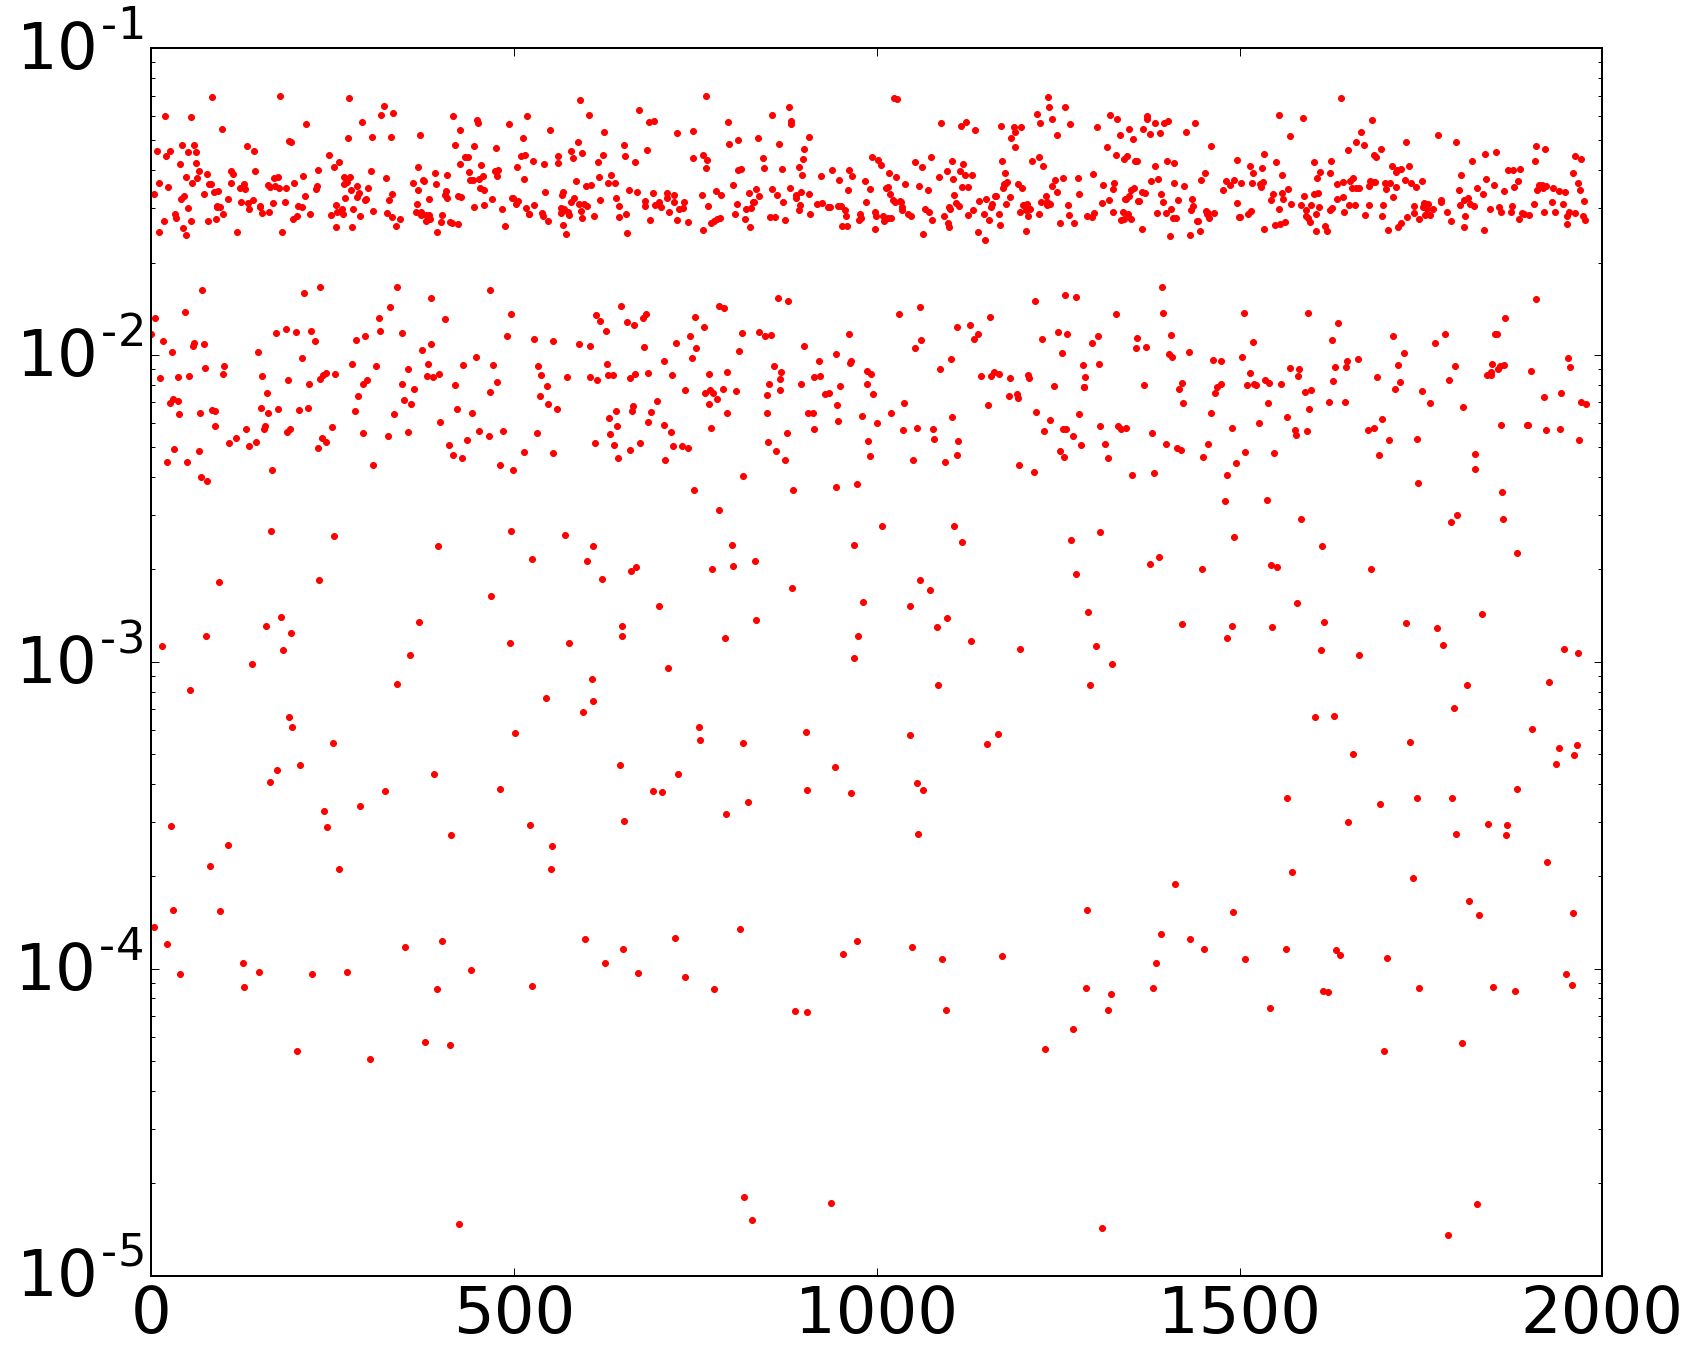

In [5]:
plt.semilogy(Z,'r.')

In [6]:
mass.min(),mass.max()

(725.59135815111961, 1451.1827163022394)

In [7]:
fpol = (1-PPF)
fpol[fpol<1e-7] = 0 # Don't let tiny numbers magnify Z !! Just use Z = 0 for these guys

# Do the correcting before fixing Z for subcritical values... otherwise, we bias Z/f_pol
Zf=Z/fpol # This is our Z corrected for f_pol
Zf[np.isinf(Zf)] = 10**-7.5 # Fix Zf for sp's with very very low polluted fractions. They are essentially pristine
Zf[np.isnan(Zf)] = 10**-7.5
Zf[Zf<1e-7] = 10**-7.5

Z[Z<1e-7] = 10**-7.5

PZf=PZ/fpol
PZf[np.isinf(PZf)] = 10**-7.5
PZf[np.isnan(PZf)] = 10**-7.5

PZ[PZ<1e-7] = 10**-7.5

PPF[PPF<1e-7] = 10**-7.5

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide


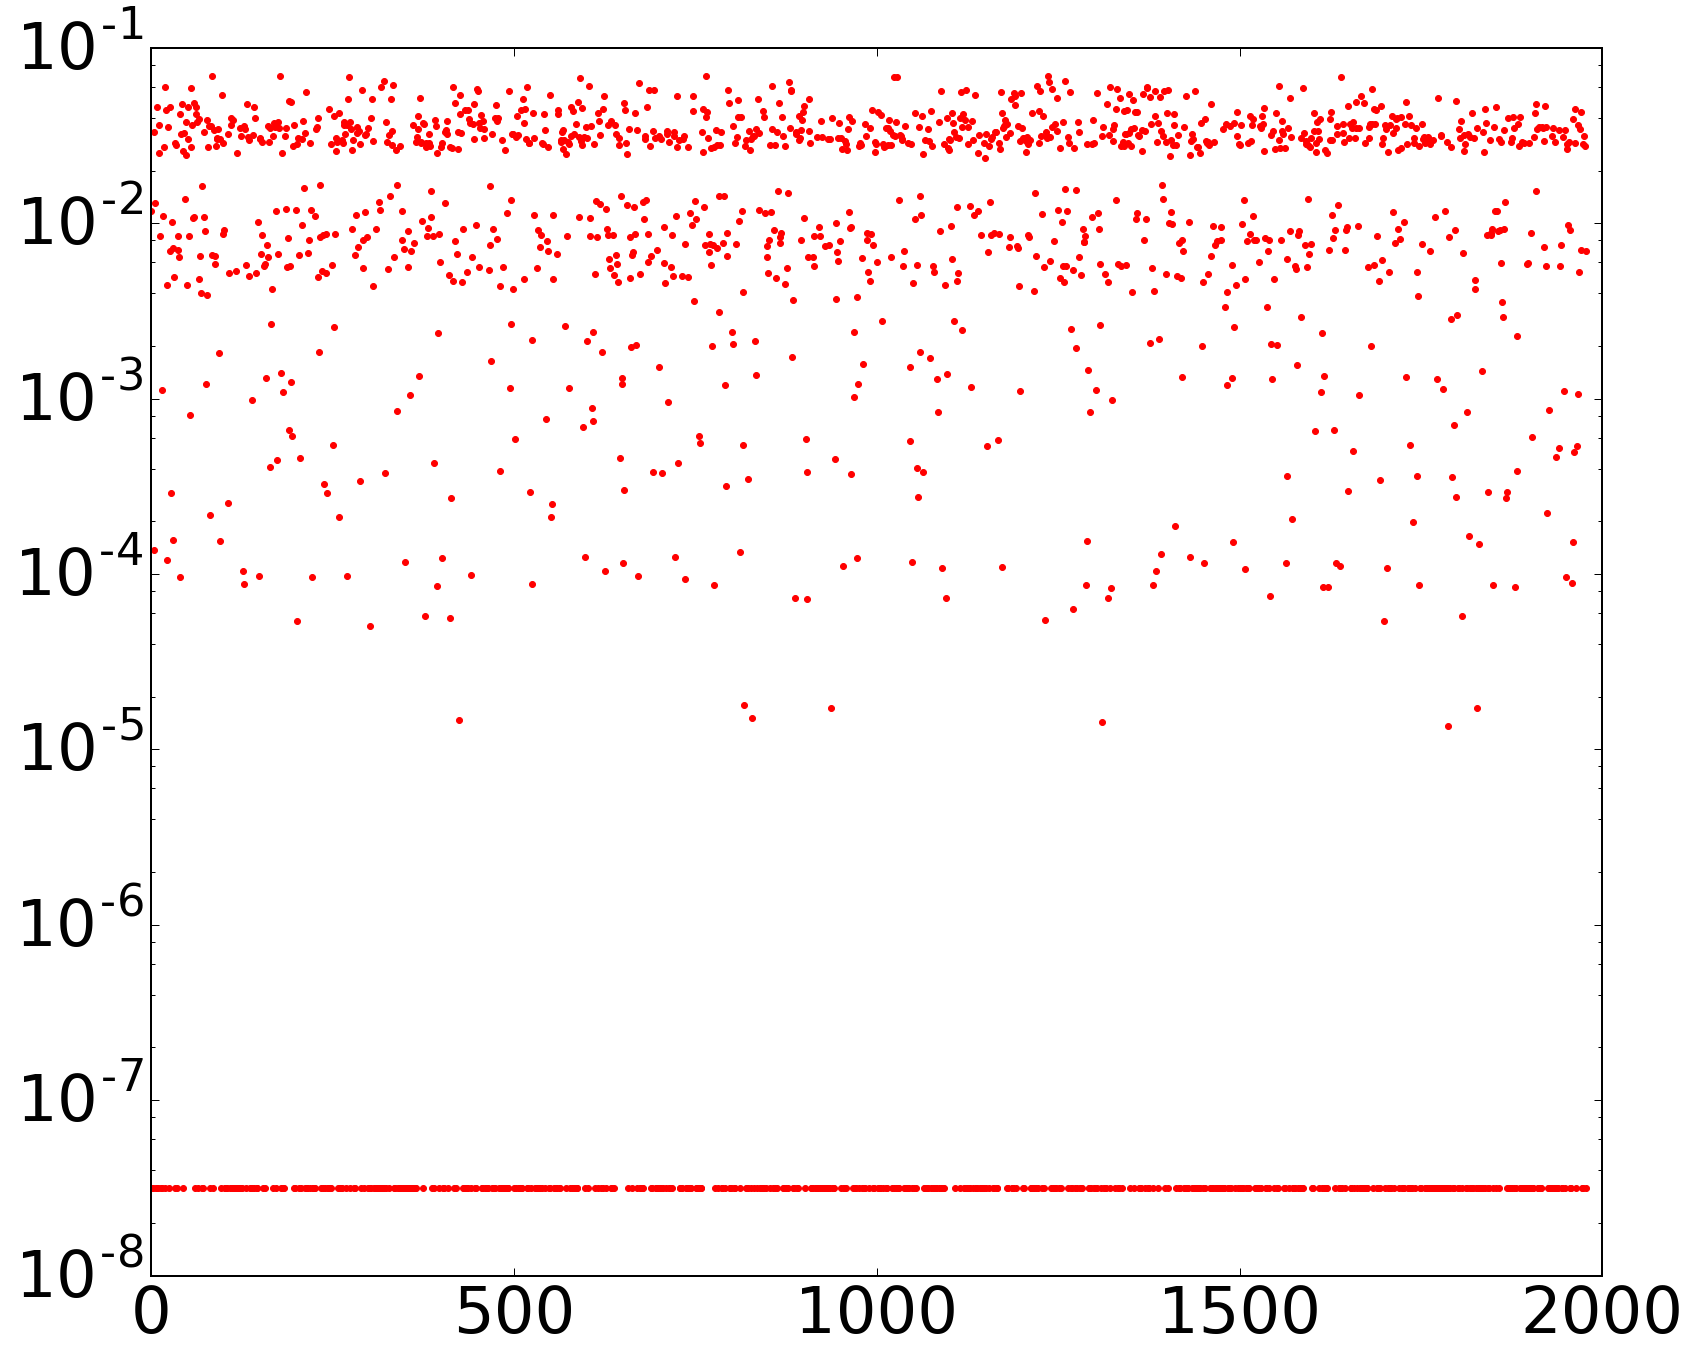

In [8]:
plt.semilogy(Z,'r.')

In [9]:
# Pick out stars by metallicity range... 
rng1 = (Z < 1.e-5)
rng2 = ((Z >= 1.e-5) & (Z < 1.e-3))
rng3 = ((Z >= 1.e-3) & (Z < 1.e-1))
rng4 = (Z >= 1.e-1)

# Pick out stars by corrected metallicity range... 
rngf1 = (Zf < 1.e-5)
rngf2 = ((Zf >= 1.e-5) & (Zf < 1.e-3))
rngf3 = ((Zf >= 1.e-3) & (Zf < 1.e-1))
rngf4 = (Zf >= 1.e-1)

# Pick out stars by pristine fraction, in ranges... 
pfrng1 = (PPF < 1.e-5)
pfrng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
pfrng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
pfrng4 = (PPF >= 1.e-1)

pzrng1 = (PZ < 1.e-5)
pzrng2 = ((PZ >= 1.e-5) & (PZ < 1.e-3))
pzrng3 = ((PZ >= 1.e-3) & (PZ < 1.e-1))
pzrng4 = (PZ >= 1.e-1)

pzrngf1 = (PZf < 1.e-5)
pzrngf2 = ((PZf >= 1.e-5) & (PZf < 1.e-3))
pzrngf3 = ((PZf >= 1.e-3) & (PZf < 1.e-1))
pzrngf4 = (PZf >= 1.e-1)

In [44]:
# Ranges old... we need Z < Z_crit as lowest

# Pick out stars by metallicity range... 
# rng1 = (Z <= 1.e-5)
# rng2 = ((Z > 1.e-5) & (Z <= 1.e-3))
# rng3 = ((Z > 1.e-3) & (Z <= 1.e-1))
# rng4 = (Z > 1.e-1)

# # Pick out stars by corrected metallicity range... 
# rngf1 = (Zf <= 1.e-5)
# rngf2 = ((Zf > 1.e-5) & (Zf <= 1.e-3))
# rngf3 = ((Zf > 1.e-3) & (Zf <= 1.e-1))
# rngf4 = (Zf > 1.e-1)

# # Pick out stars by pristine fraction, in ranges... 
# pfrng1 = (PPF <= 1.e-5)
# pfrng2 = ((PPF > 1.e-5) & (PPF <= 1.e-3))
# pfrng3 = ((PPF > 1.e-3) & (PPF <= 1.e-1))
# pfrng4 = (PPF > 1.e-1)

# pzrng1 = (PZ <= 1.e-5)
# pzrng2 = ((PZ > 1.e-5) & (PZ <= 1.e-3))
# pzrng3 = ((PZ > 1.e-3) & (PZ <= 1.e-1))
# pzrng4 = (PZ > 1.e-1)

# pzrngf1 = (PZf <= 1.e-5)
# pzrngf2 = ((PZf > 1.e-5) & (PZf <= 1.e-3))
# pzrngf3 = ((PZf > 1.e-3) & (PZf <= 1.e-1))
# pzrngf4 = (PZf > 1.e-1)

In [10]:
z1=np.log10(Z[rng1])
z2=np.log10(Z[rng2])
z3=np.log10(Z[rng3])
z4=np.log10(Z[rng4])

zf1=np.log10(Zf[rngf1]) # zf is the corrected Z of the star particle
zf2=np.log10(Zf[rngf2])
zf3=np.log10(Zf[rngf3])
zf4=np.log10(Zf[rngf4])

pf1=np.log10(PPF[pfrng1])
pf2=np.log10(PPF[pfrng2])
pf3=np.log10(PPF[pfrng3])
pf4=np.log10(PPF[pfrng4])

pz1=np.log10(PZ[pzrng1])
pz2=np.log10(PZ[pzrng2])
pz3=np.log10(PZ[pzrng3])
pz4=np.log10(PZ[pzrng4])

pzf1=np.log10(PZf[pzrngf1])
pzf2=np.log10(PZf[pzrngf2])
pzf3=np.log10(PZf[pzrngf3])
pzf4=np.log10(PZf[pzrngf4])

In [12]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(ii) for ii in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
vmin=-5.0
bounds = np.linspace(vmin,0,31)
ticks  =[-5,-4,-3,-2,-1,0]
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)



-0.788888888889 0.788888888889
-1.57777777778
1.5777777777777777


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


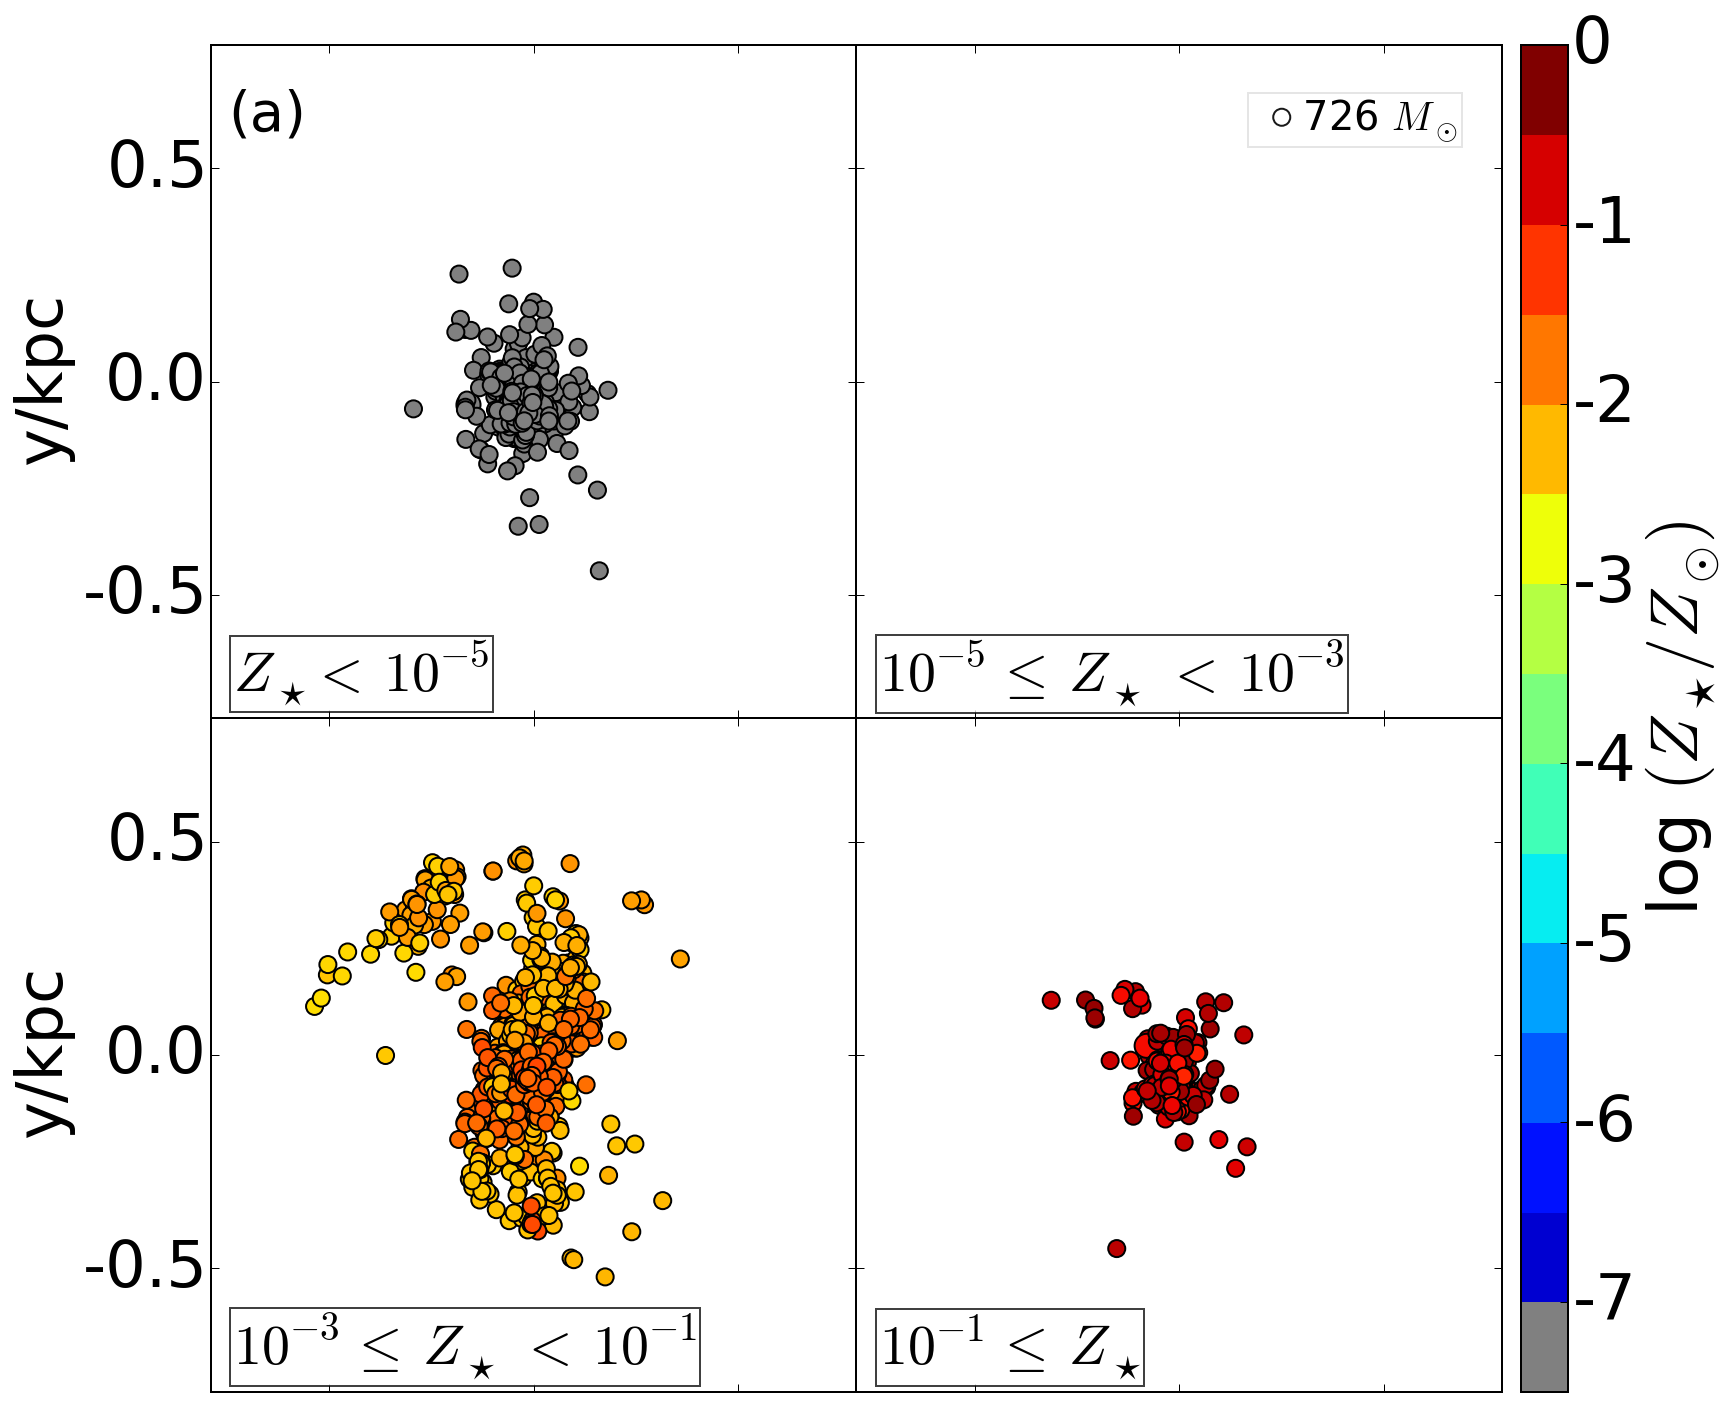

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=mass[rngf1]/dotNorm, c=zf1, cmap=cmap,vmin=vmin, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=mass[rngf2]/dotNorm, c=zf2, cmap=cmap,vmin=vmin, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=mass[rngf3]/dotNorm, c=zf3, cmap=cmap,vmin=vmin, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=mass[rngf4]/dotNorm, c=zf4, cmap=cmap,vmin=vmin, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, Z_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, Z_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, Z_{\star}\,$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(a)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
print(startx,endx)
print(startx-endx)
print(sbox)

formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)

#ax3.set_xlabel('x kpc')
#ax4.set_xlabel('x kpc')
ax1.set_ylabel('y [kpc]')
ax3.set_ylabel('y [kpc]')

xpos = ax2.get_xlim()[1] - 0.15 * ax1.get_xlim()[1] # The box
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1] # The box
size = min(mass)
legStr = '    {:.0f}'.format(size)
legStr = legStr + " $M_{\odot}$"
bbox = {'facecolor':'white', 'alpha':0.1, 'pad':4}
ax2.annotate(legStr,xy=(xpos,ypos), xytext=(xpos+0.01, ypos), horizontalalignment='right', bbox=bbox, size=20)
ax2.scatter(np.array([xoff]), np.array([yoff]), s=np.array([min(mass)])/dotNorm,facecolors='none')


# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $(Z_{\star}/Z_{\odot})$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
plt.savefig("SP_Z_locs_Zcut_newThresh_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()




(-0.78888888888888886, 0.78888888888888886)
-1.57777777778
1.57777777778


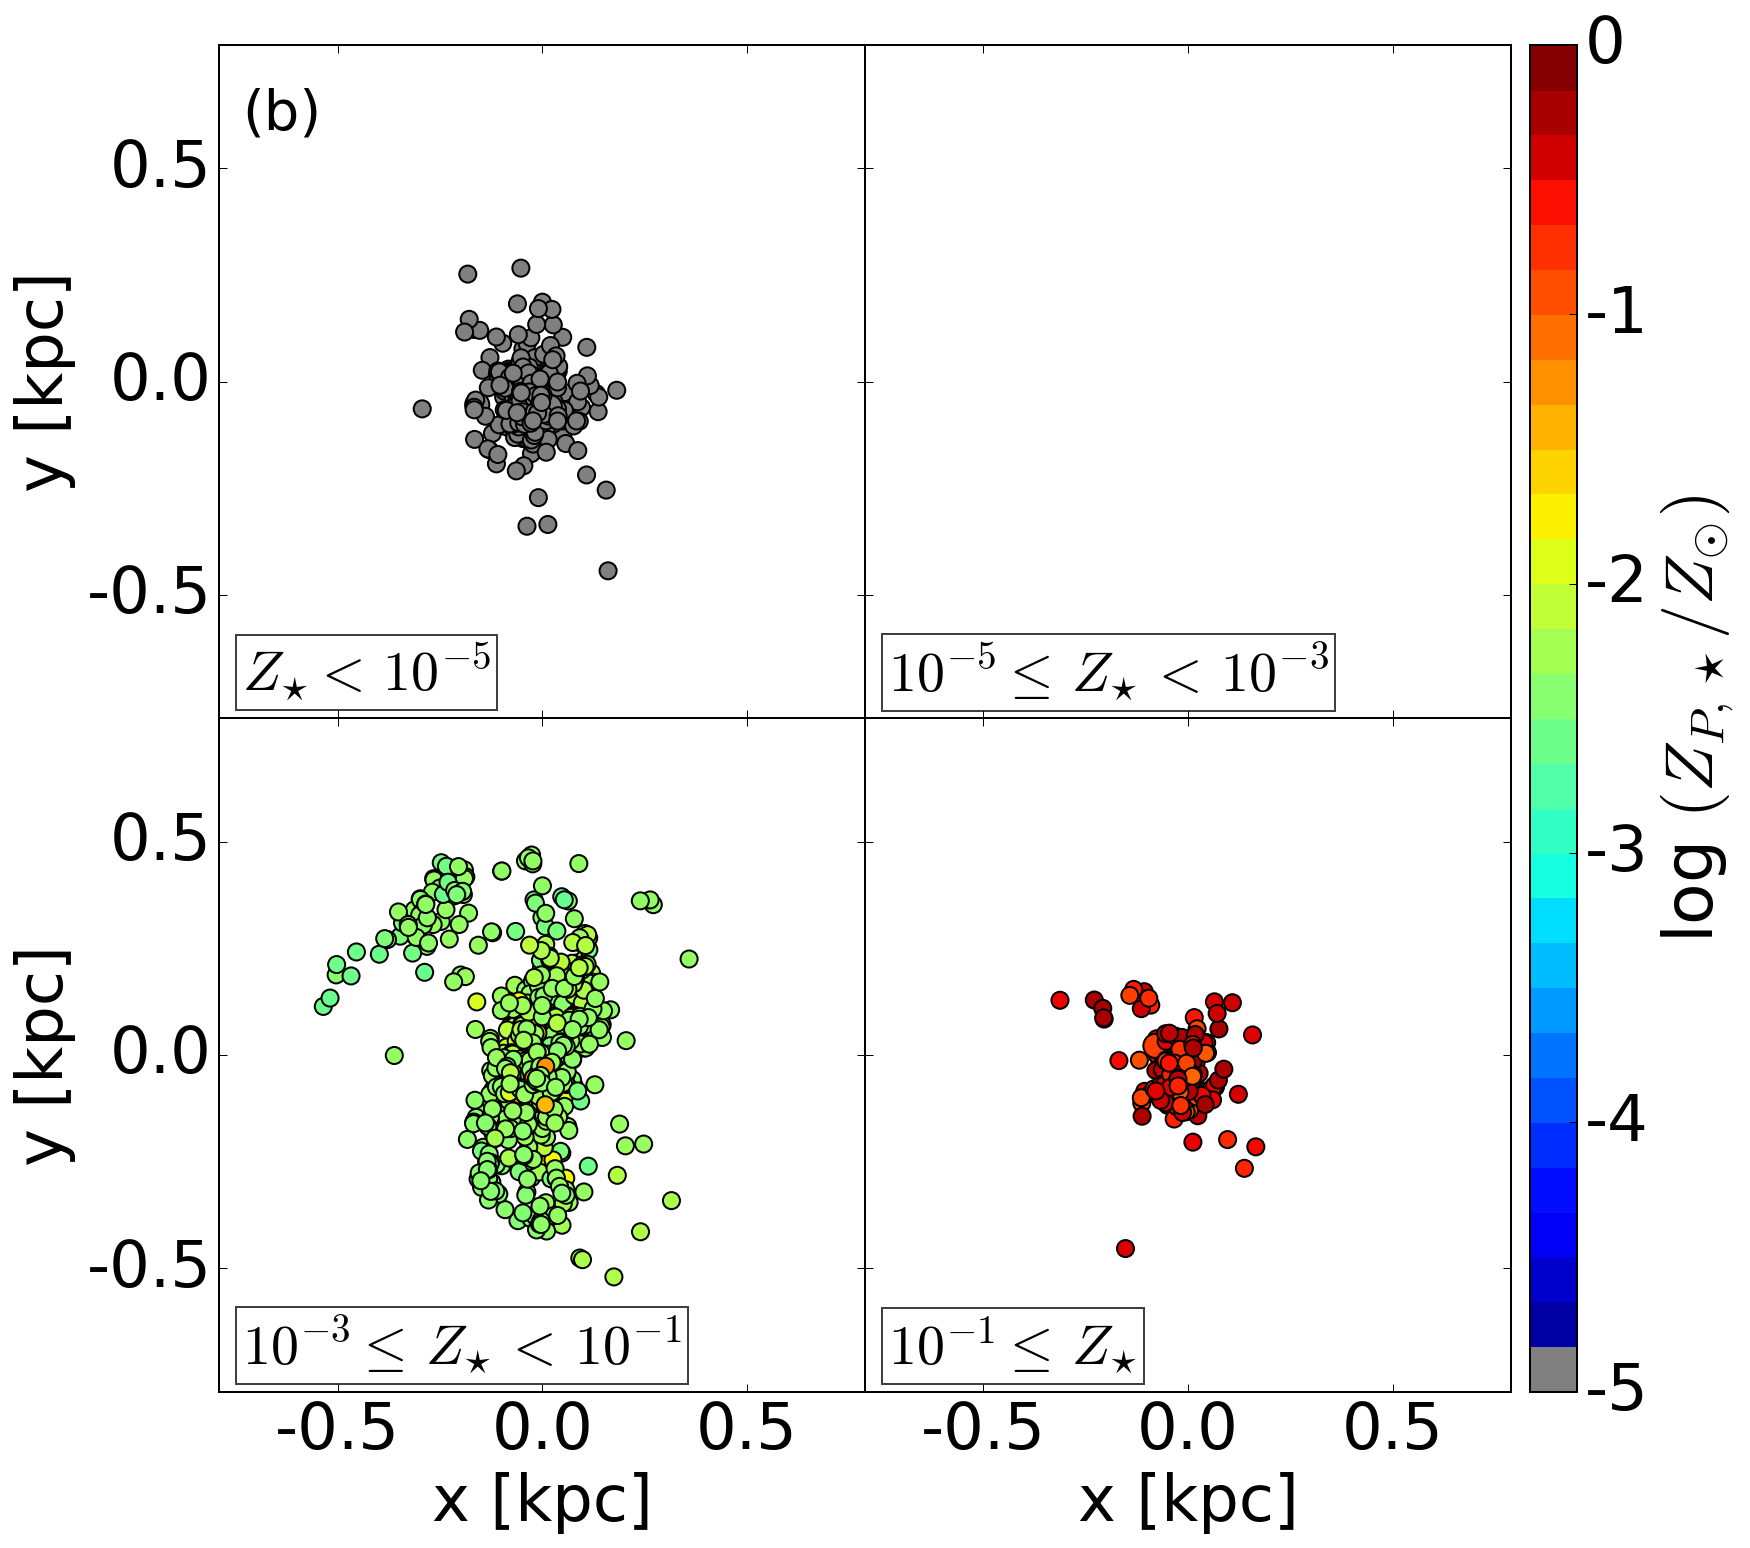

In [17]:
# Color according to Z_P ... but cut on Z/Z_fpol
# Use Z cuts for PPF data... 
z1=np.log10(PZf[rngf1])
z2=np.log10(PZf[rngf2])
z3=np.log10(PZf[rngf3])
z4=np.log10(PZf[rngf4])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=mass[rngf1]/dotNorm, c=z1, cmap=cmap,vmin=vmin, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=mass[rngf2]/dotNorm, c=z2, cmap=cmap,vmin=vmin, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=mass[rngf3]/dotNorm, c=z3, cmap=cmap,vmin=vmin, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=mass[rngf4]/dotNorm, c=z4, cmap=cmap,vmin=vmin, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, Z_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, Z_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, Z_{\star}\,$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(b)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)
print(startx,endx)
print(startx-endx)
print(sbox)

ax3.set_xlabel('x [kpc]')
ax4.set_xlabel('x [kpc]')
ax1.set_ylabel('y [kpc]')
ax3.set_ylabel('y [kpc]')

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel(r'log $(Z_{P, \star}/Z_{\odot})$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
plt.savefig("SP_PZ_locs_Zcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()



(-0.78888888888888886, 0.78888888888888886)
-1.57777777778
1.57777777778


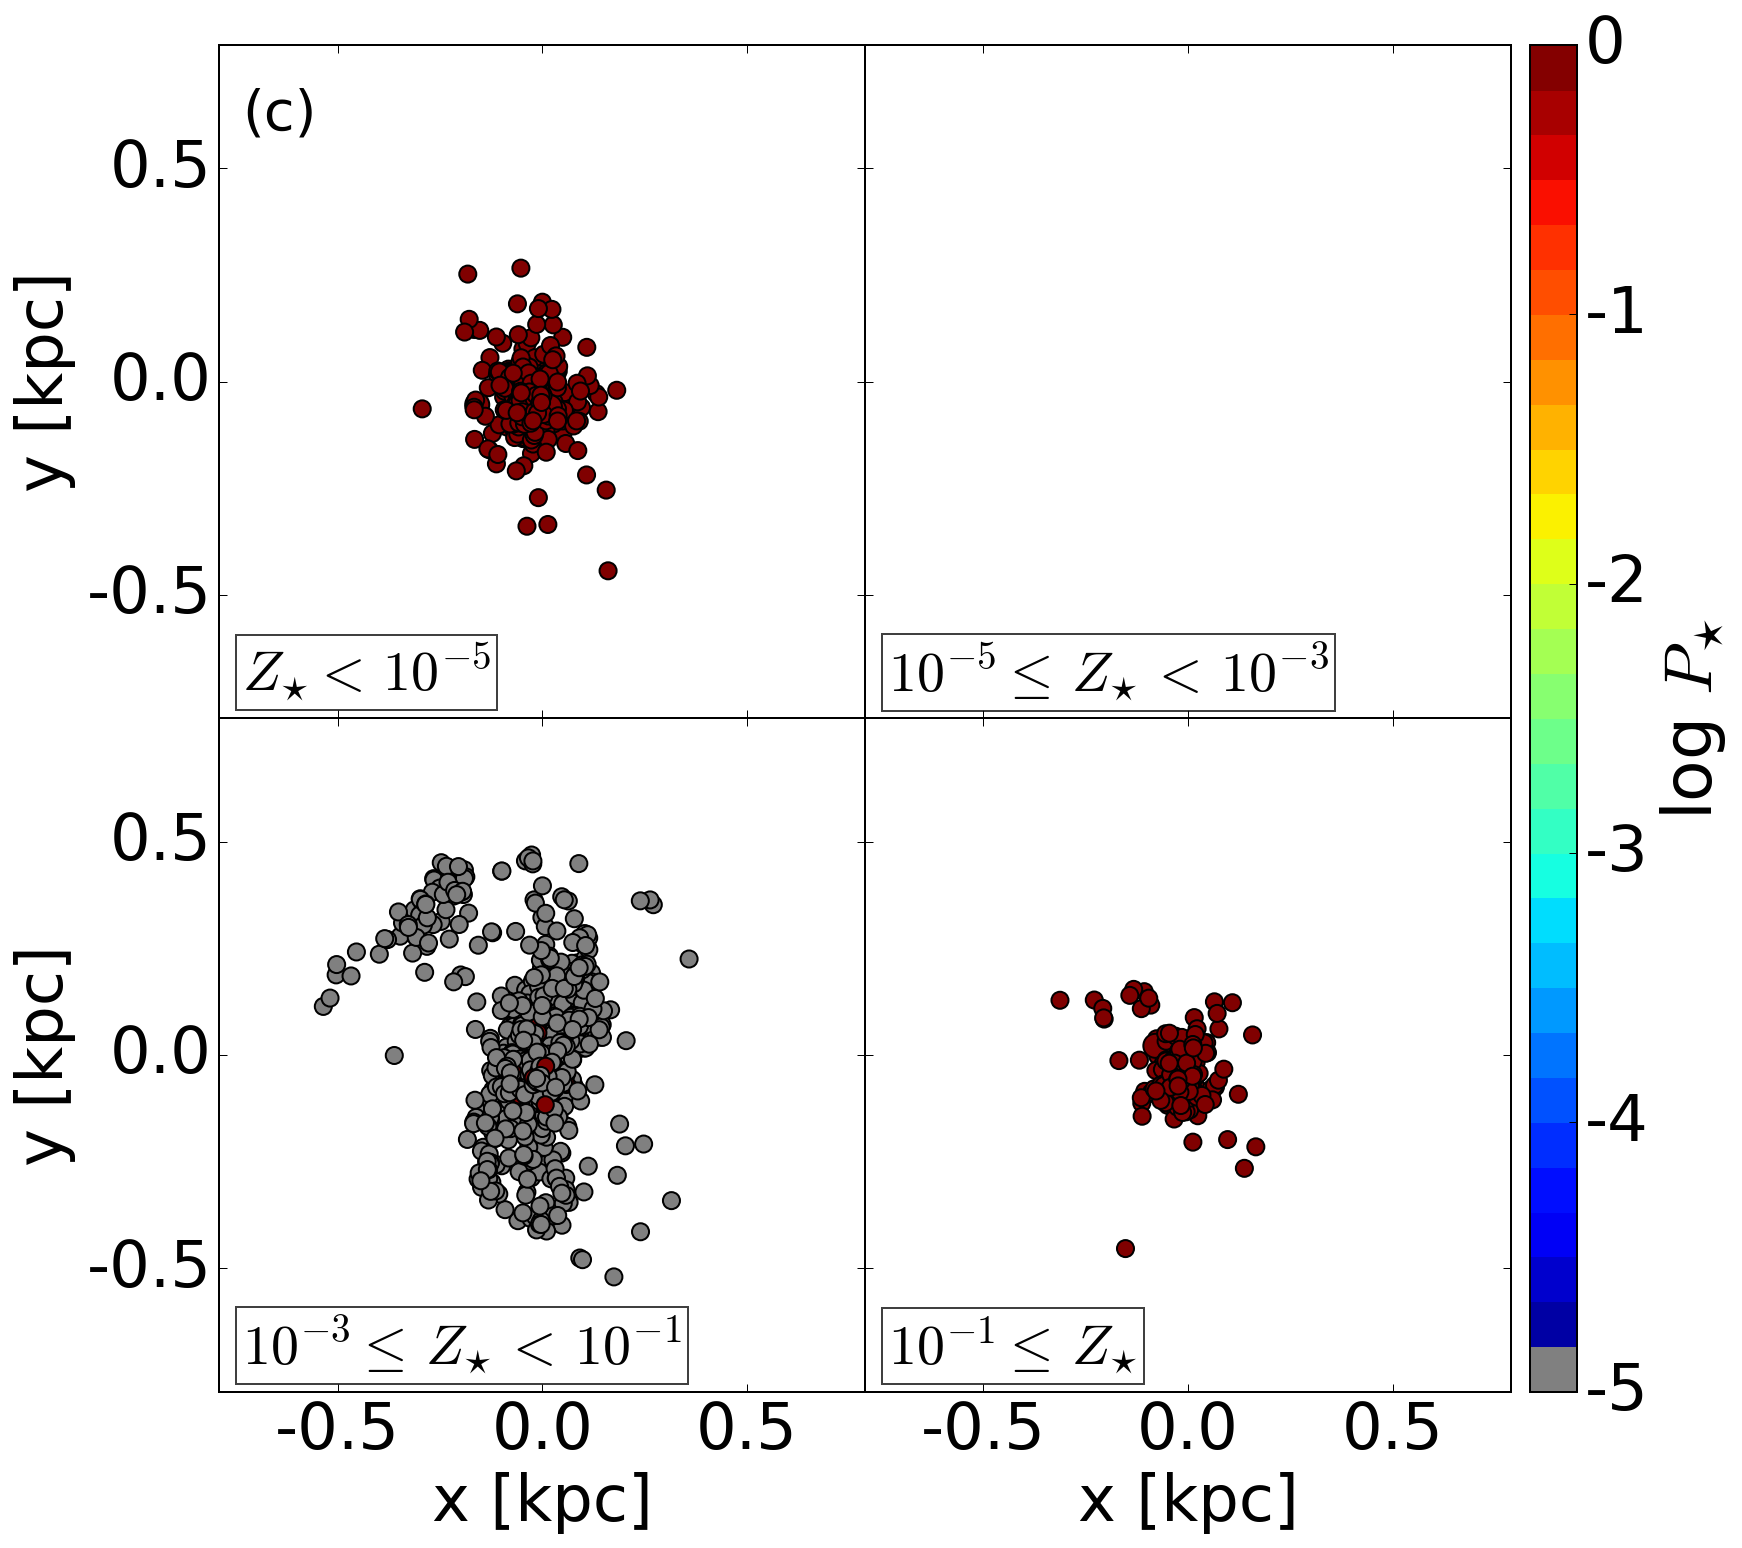

In [19]:
#rng1 = (PPF < 1.e-5)
#rng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
#rng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
#rng4 = (PPF >= 1.e-1)
# Use Z cuts for PPF data... 
z1=np.log10(PPF[rngf1])
z2=np.log10(PPF[rngf2])
z3=np.log10(PPF[rngf3])
z4=np.log10(PPF[rngf4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=mass[rngf1]/dotNorm, c=z1, cmap=cmap,vmin=vmin, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=mass[rngf2]/dotNorm, c=z2, cmap=cmap,vmin=vmin, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=mass[rngf3]/dotNorm, c=z3, cmap=cmap,vmin=vmin, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=mass[rngf4]/dotNorm, c=z4, cmap=cmap,vmin=vmin, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, Z_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, Z_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, Z_{\star}\,$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

ax3.set_xlabel('x [kpc]')
ax4.set_xlabel('x [kpc]')
ax1.set_ylabel('y [kpc]')
ax3.set_ylabel('y [kpc]')
print(startx,endx)
print(startx-endx)
print(sbox)


# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
plt.savefig("SP_PF_locs_Zcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()



-0.788888888889 0.788888888889
-1.57777777778
1.5777777777777777


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


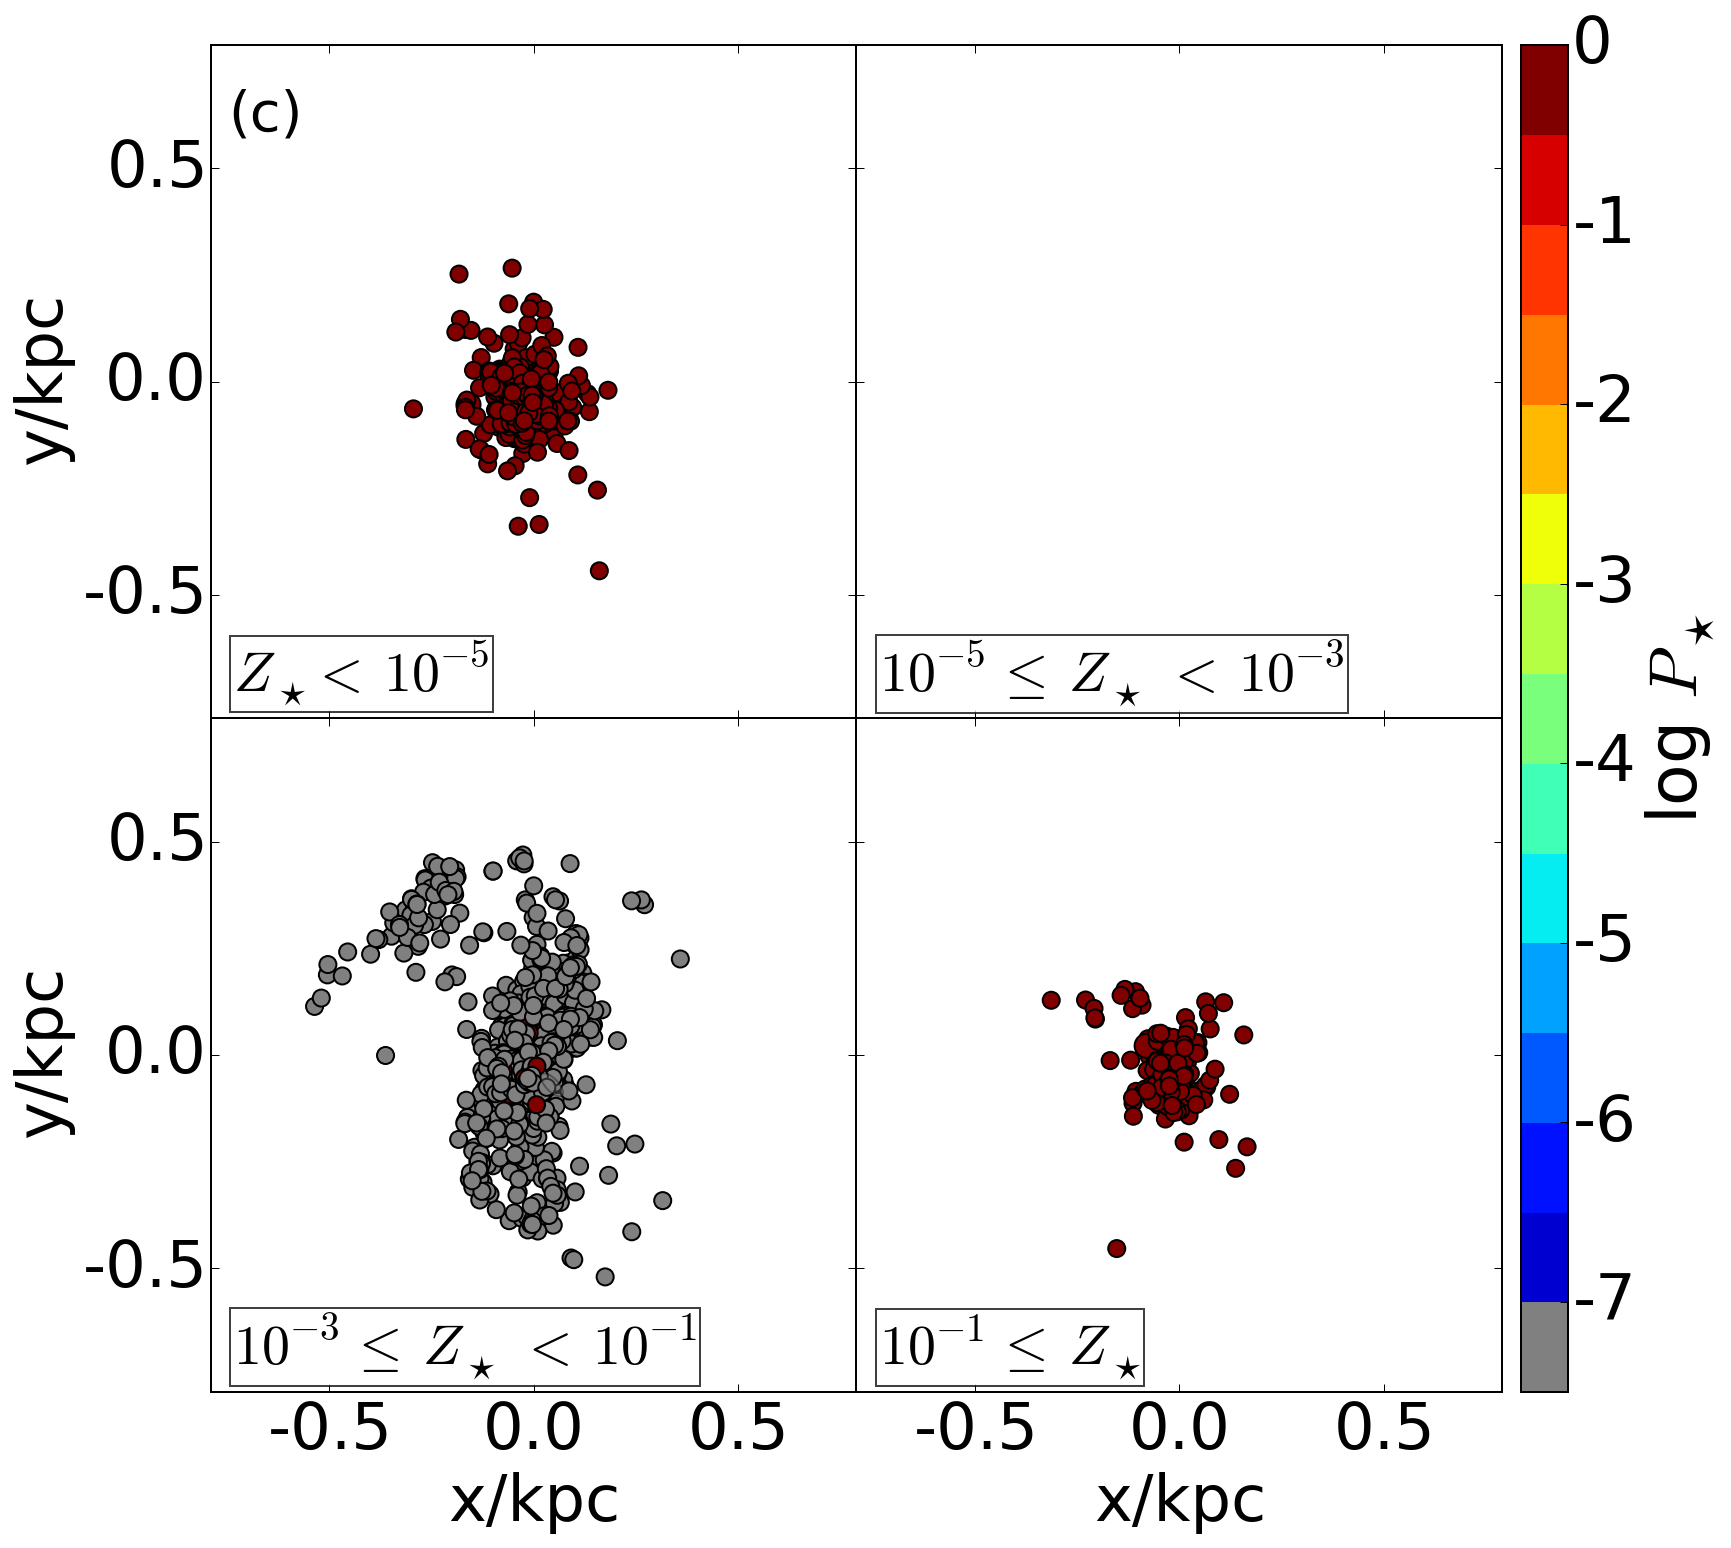

In [61]:
from mpl_toolkits.axes_grid.anchored_artists import AnchoredDrawingArea
from mpl_toolkits.axes_grid.anchored_artists import AnchoredAuxTransformBox
from matplotlib.patches import Rectangle, Ellipse, Circle

#rng1 = (PPF < 1.e-5)
#rng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
#rng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
#rng4 = (PPF >= 1.e-1)
# Use Z cuts for PPF data... 
z1=np.log10(PPF[rngf1])
z2=np.log10(PPF[rngf2])
z3=np.log10(PPF[rngf3])
z4=np.log10(PPF[rngf4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=mass[rngf1]/dotNorm, c=z1, cmap=cmap,vmin=vmin, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=mass[rngf2]/dotNorm, c=z2, cmap=cmap,vmin=vmin, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=mass[rngf3]/dotNorm, c=z3, cmap=cmap,vmin=vmin, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=mass[rngf4]/dotNorm, c=z4, cmap=cmap,vmin=vmin, vmax=0)


#currentAxis = ax3.gca()
ax3.add_patch(Ellipse((0.045, -0.07), 0.03, 0.07, angle=45.0, facecolor="grey", alpha=0.35))


# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, Z_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, Z_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, Z_{\star}\,$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

ax3.set_xlabel('x [kpc]')
ax4.set_xlabel('x [kpc]')
ax1.set_ylabel('y [kpc]')
ax3.set_ylabel('y [kpc]')
print(startx,endx)
print(startx-endx)
print(sbox)


# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
plt.savefig("SP_PF_locs_Zcut_z=%04.1lf-%d-oval.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()



-0.788888888889 0.788888888889
-1.57777777778
1.5777777777777777


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


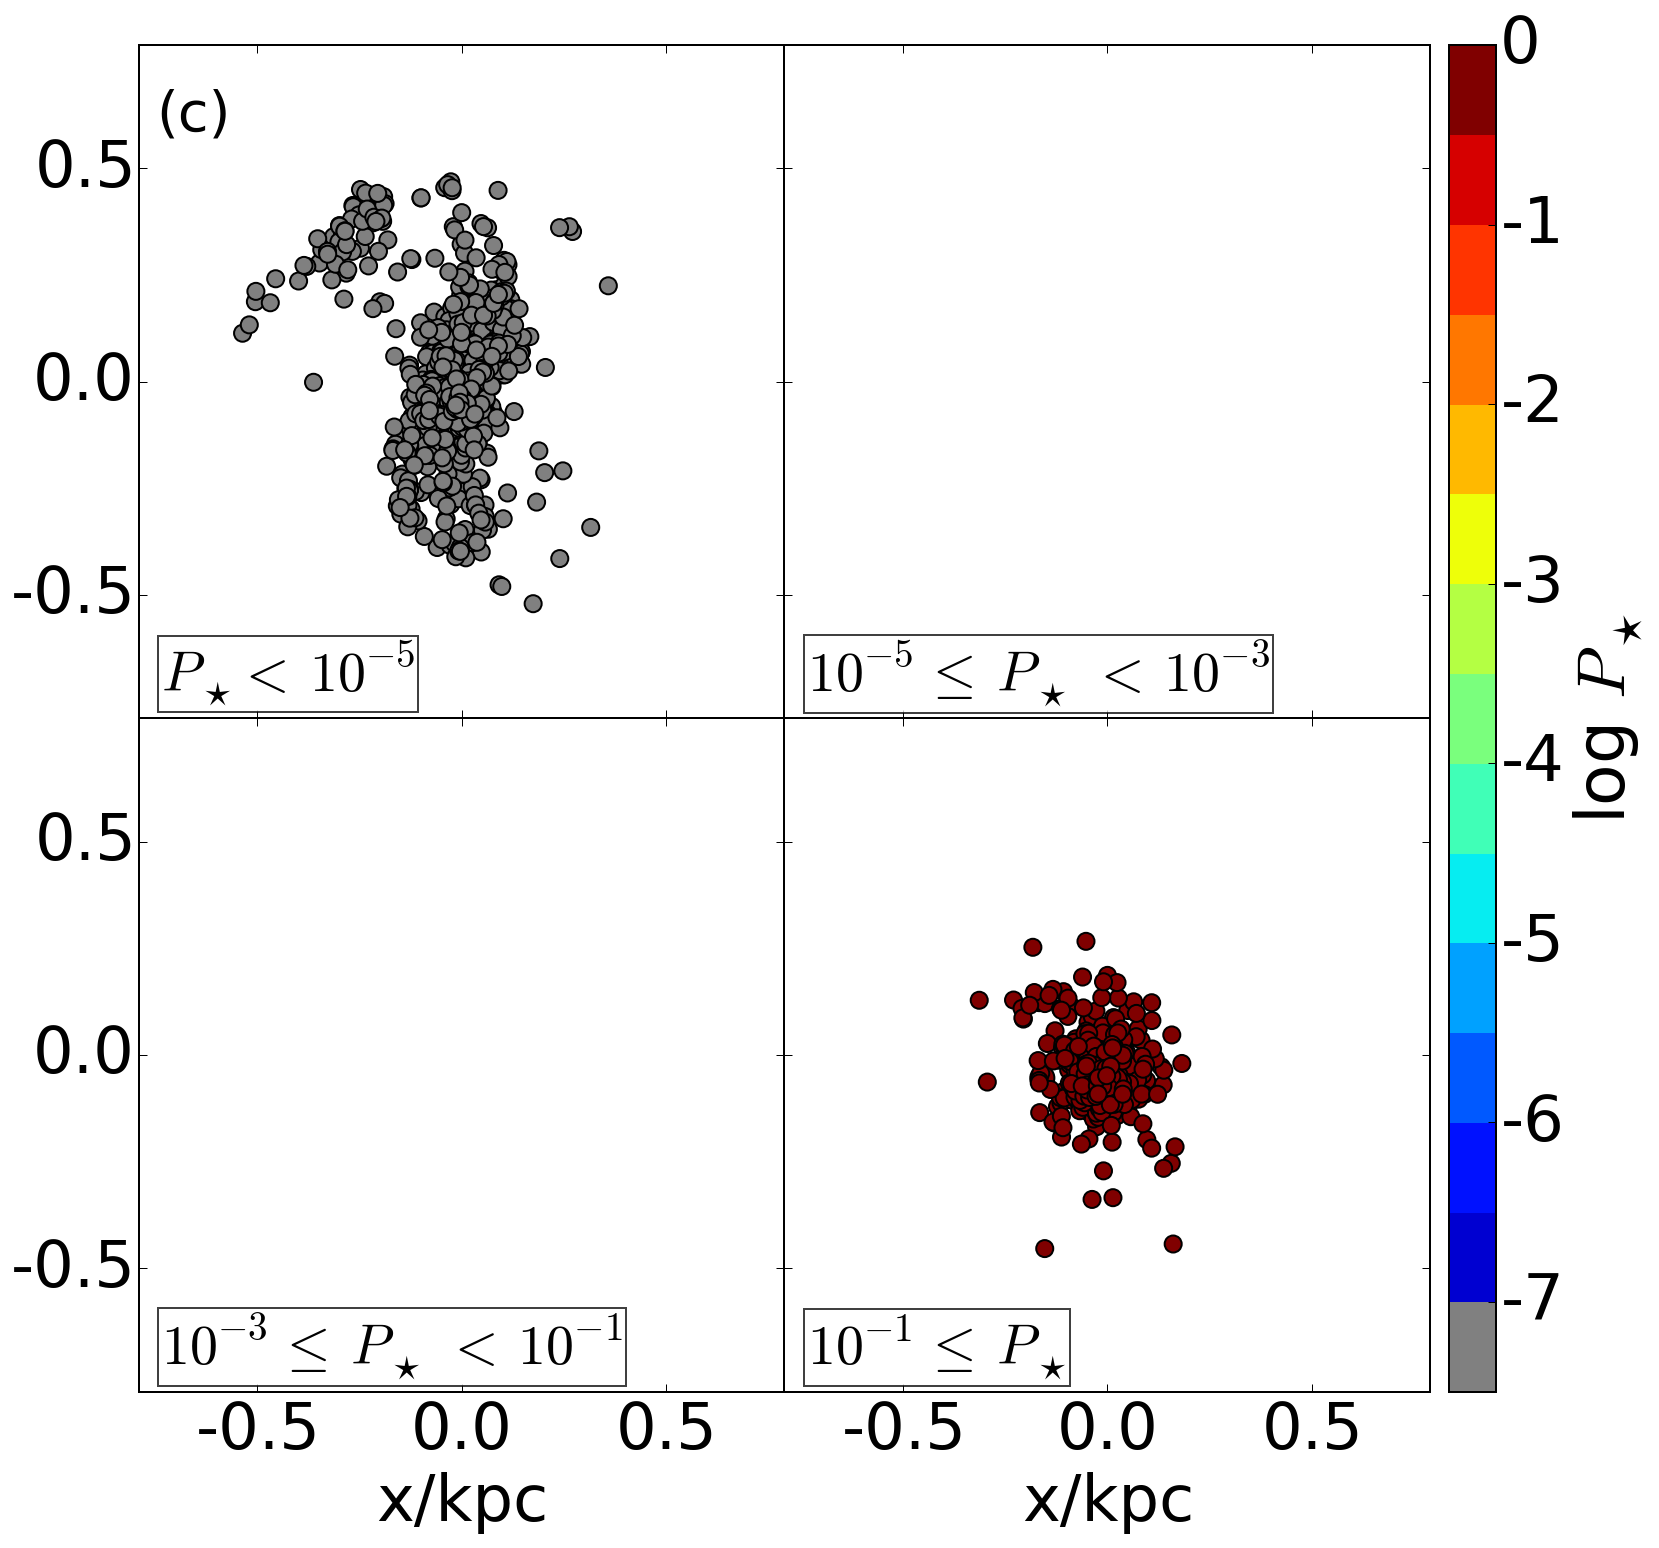

In [62]:
rng1 = (PPF < 1.e-5)
rng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
rng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
rng4 = (PPF >= 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(PPF[rng1])
z2=np.log10(PPF[rng2])
z3=np.log10(PPF[rng3])
z4=np.log10(PPF[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rng1], ycoord[rng1], s=mass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=vmin, vmax=0)
ax2.scatter(xcoord[rng2], ycoord[rng2], s=mass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=vmin, vmax=0)
ax3.scatter(xcoord[rng3], ycoord[rng3], s=mass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=vmin, vmax=0)
ax4.scatter(xcoord[rng4], ycoord[rng4], s=mass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=vmin, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$P_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, P_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, P_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, P_{\star}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)


ax3.set_xlabel('x [kpc]')
ax4.set_xlabel('x [kpc]')
#ax1.set_ylabel('y kpc')
#ax3.set_ylabel('y kpc')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_PF_locs_PFcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()



-0.788888888889 0.788888888889
-1.57777777778
1.5777777777777777


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


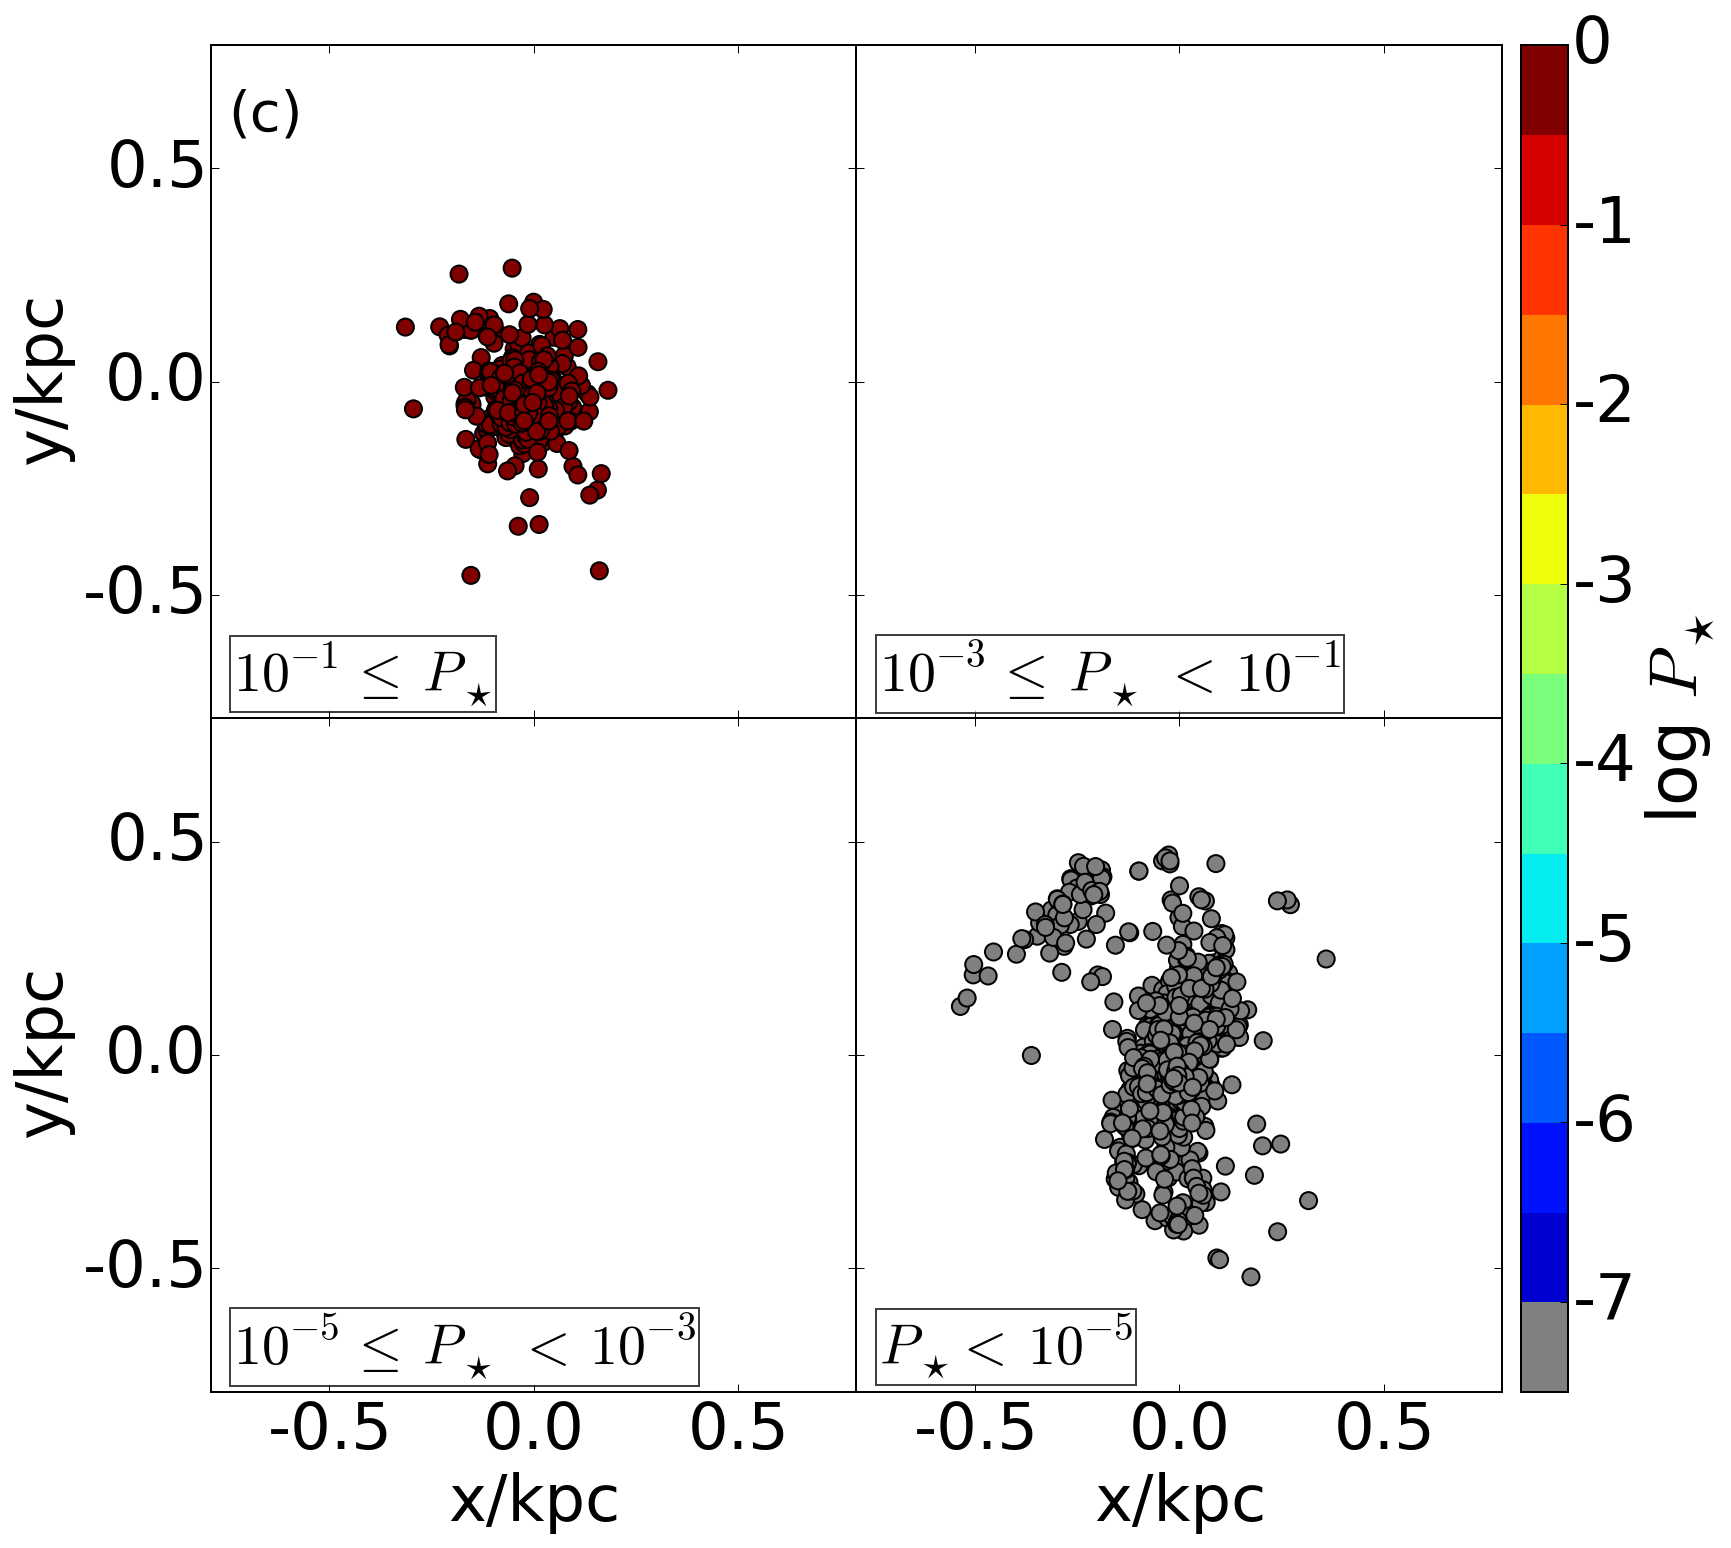

In [63]:
rng1 = (PPF < 1.e-5)
rng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
rng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
rng4 = (PPF >= 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(PPF[rng1])
z2=np.log10(PPF[rng2])
z3=np.log10(PPF[rng3])
z4=np.log10(PPF[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax4.scatter(xcoord[rng1], ycoord[rng1], s=mass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=vmin, vmax=0)
ax3.scatter(xcoord[rng2], ycoord[rng2], s=mass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=vmin, vmax=0)
ax2.scatter(xcoord[rng3], ycoord[rng3], s=mass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=vmin, vmax=0)
ax1.scatter(xcoord[rng4], ycoord[rng4], s=mass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=vmin, vmax=0)

#currentAxis = ax3.gca()
#ax3.add_patch(Ellipse((0.045, -0.067), 0.04, 0.15, angle=45.0, facecolor="grey", alpha=0.35))

# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax4.text(xpos,ypos,'$P_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-5} \leq\, P_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-3} \leq\, P_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax1.text(xpos,ypos,'$10^{-1} \leq\, P_{\star}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

#ax1.yaxis.set_ticks([]); ax1.yaxis.set_major_formatter(formatter)
#ax3.yaxis.set_ticks([]); ax3.yaxis.set_major_formatter(formatter)

ax3.set_xlabel('x [kpc]')
ax4.set_xlabel('x [kpc]')
ax1.set_ylabel('y [kpc]')
ax3.set_ylabel('y [kpc]')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
plt.savefig("SP_PF_locs_PFcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [64]:
gc.collect()

29570



(-0.78888888888888886, 0.78888888888888886)
-1.57777777778
1.57777777778


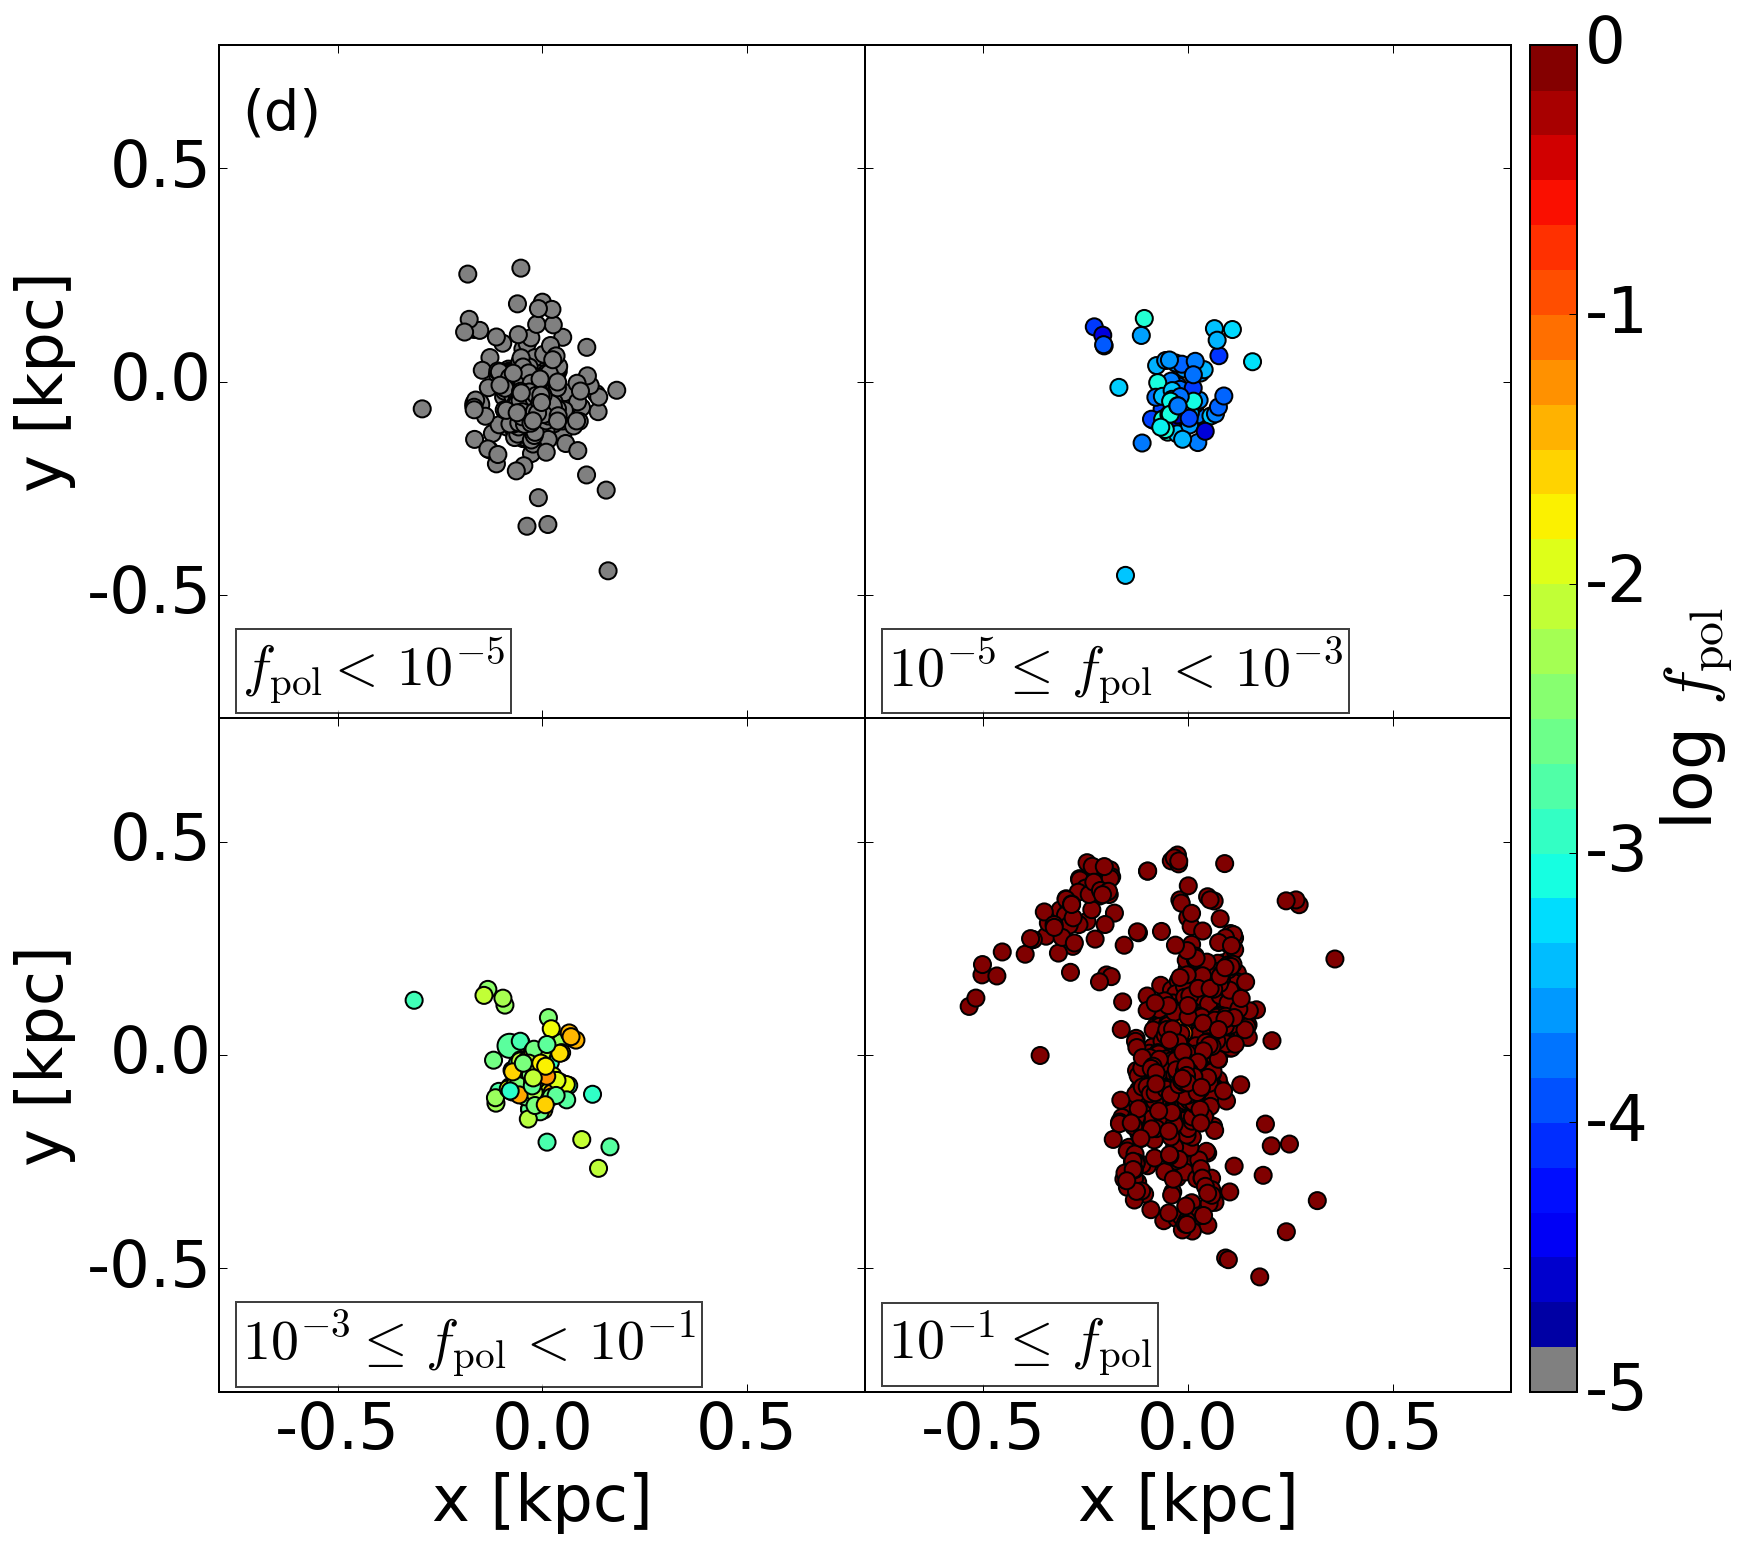

In [16]:
# Plotting fpol: a particle that is 99% pristine falls in P >= .1 ... 
# But that same particle is 1-.99 = 0.01 polluted ... and falls in 0.001 <= fpol < 0.1
fpol[fpol < 1e-7] = 10**-7.5
rng1 = (fpol < 1.e-5)
rng2 = ((fpol >= 1.e-5) & (fpol < 1.e-3))
rng3 = ((fpol >= 1.e-3) & (fpol < 1.e-1))
rng4 = (fpol >= 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(fpol[rng1])
z2=np.log10(fpol[rng2])
z3=np.log10(fpol[rng3])
z4=np.log10(fpol[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rng1], ycoord[rng1], s=mass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=vmin, vmax=0)
ax2.scatter(xcoord[rng2], ycoord[rng2], s=mass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=vmin, vmax=0)
ax3.scatter(xcoord[rng3], ycoord[rng3], s=mass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=vmin, vmax=0)
ax4.scatter(xcoord[rng4], ycoord[rng4], s=mass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=vmin, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.095 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,r'$f_{\rm pol} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,r'$10^{-5} \leq\, f_{\rm pol}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,r'$10^{-3} \leq\, f_{\rm pol}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,r'$10^{-1} \leq\, f_{\rm pol}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(d)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)

ax3.set_xlabel('x [kpc]')
ax4.set_xlabel('x [kpc]')
ax1.set_ylabel('y [kpc]')
ax3.set_ylabel('y [kpc]')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel(r'log $f_{\rm pol}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
plt.savefig("SP_fpol_locs_fpolcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()

(-0.1, 0.1)

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


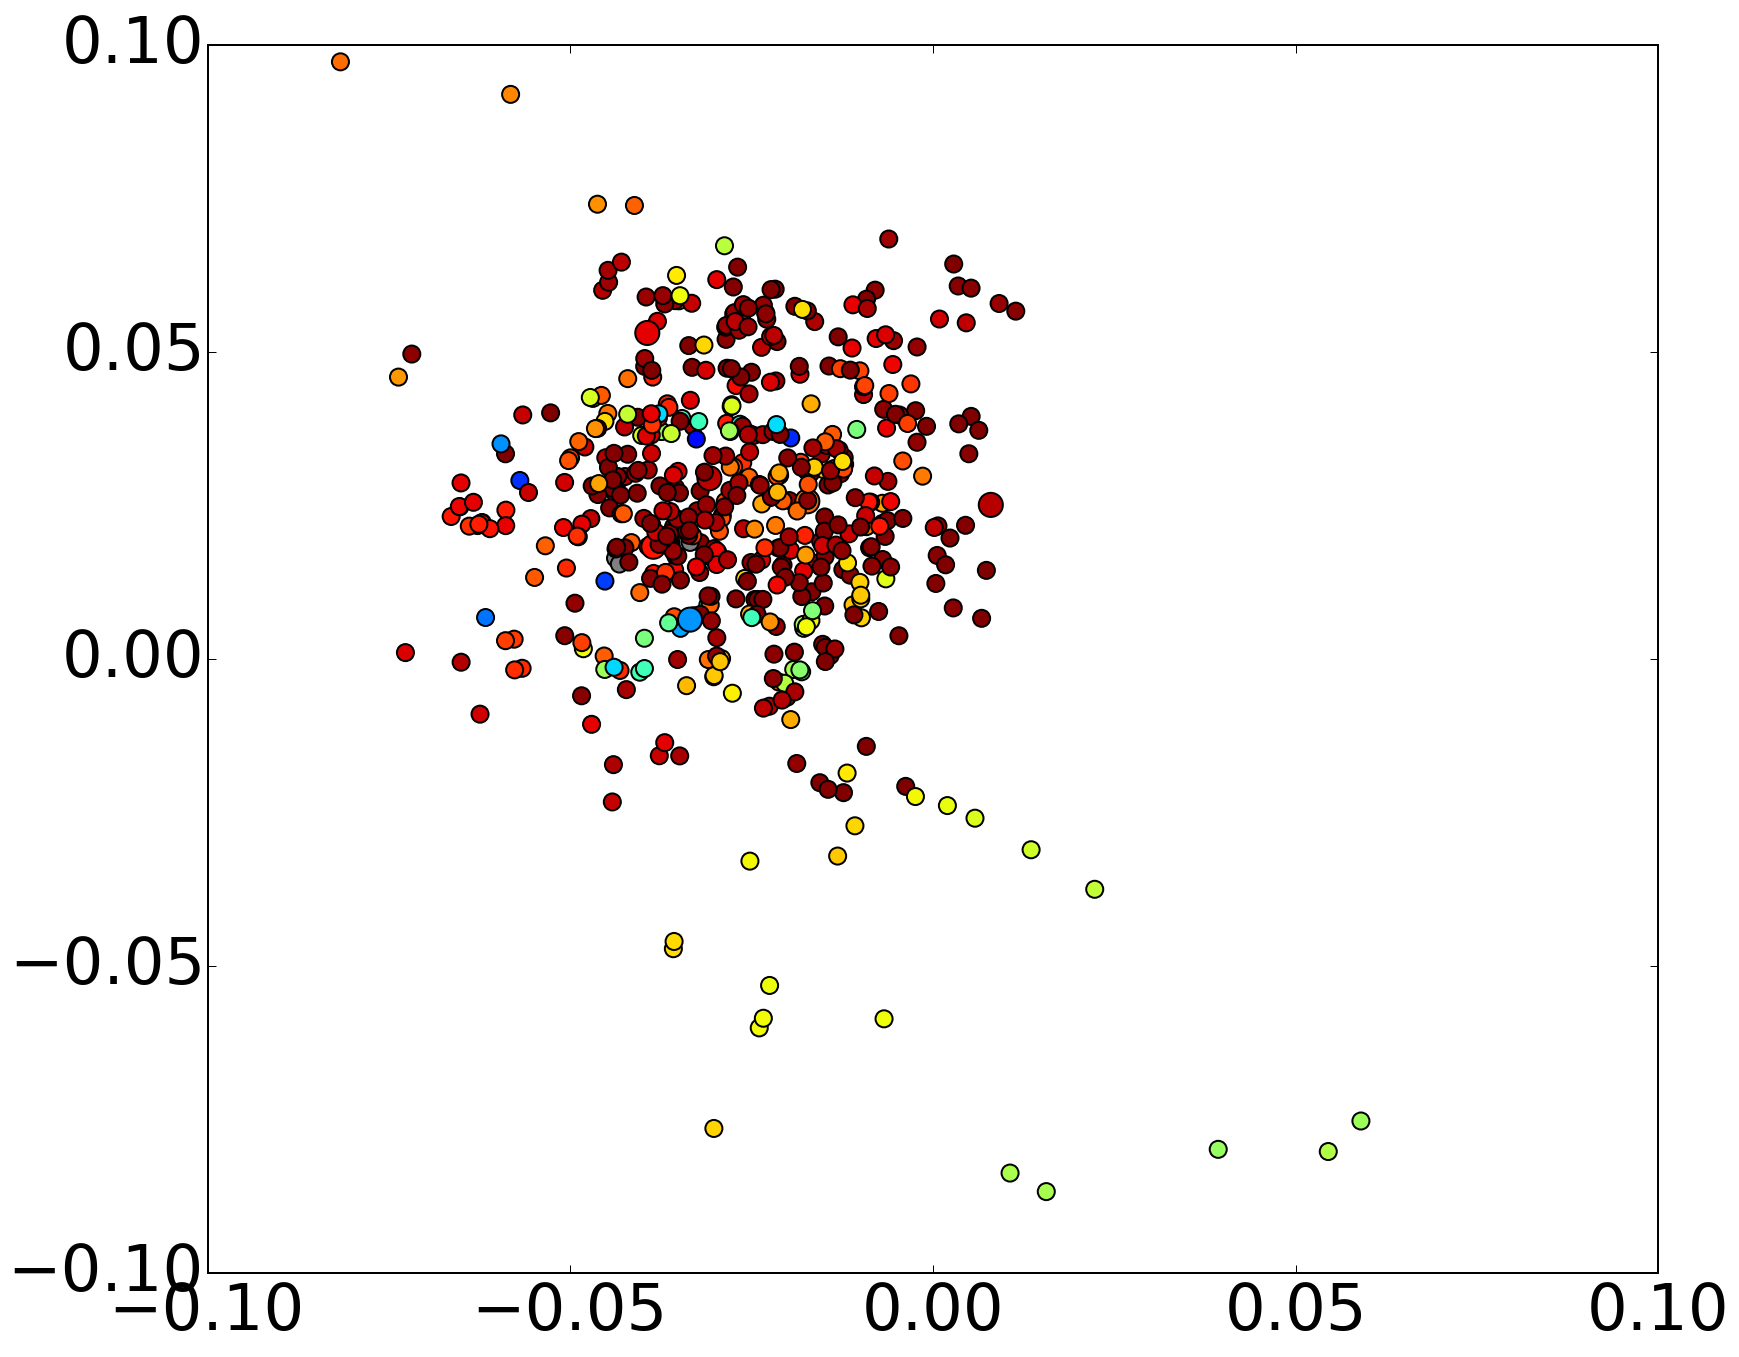

In [14]:
plt.scatter(xcoord[rngf3], ycoord[rngf3], s=mass[rngf3]/dotNorm, c=z3, cmap=cmap,vmin=vmin, vmax=0)
plt.xlim([-.1,.1])
plt.ylim([-.1,.1])